In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing

In [4]:
#Loading Dataset
db = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KDD/preprocessed_LoanDefault_2_trimmed.csv")

In [5]:
db.head()

,Unnamed: 0,X,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,...,income,credit_type,Credit_Score,co.applicant_credit_type,age,submission_of_application,LTV,Status,dtir1,oversampled_data$Y
0,1.0,1,24890,2019,0,0,0,0,0,0,...,1740,0,758,1,25-34,0,98.728814,1,45,1
1,2.0,2,24891,2019,0,0,0,1,0,0,...,4980,1,552,0,55-64,0,99.242424,1,48,1
2,2.1,2,24891,2019,0,0,0,1,0,0,...,4980,1,552,0,55-64,0,99.242424,1,48,1
3,3.0,3,24892,2019,0,0,1,0,0,0,...,9480,0,834,1,35-44,0,80.019685,0,46,0
4,4.0,4,24893,2019,0,0,0,0,3,0,...,11880,0,587,1,45-54,1,69.376900,0,42,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


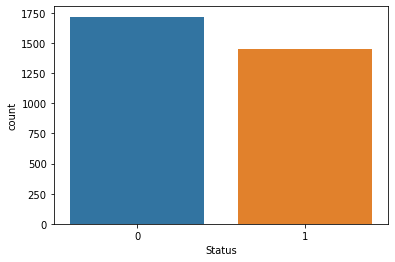

In [6]:
import seaborn as sns
sns.countplot(db['oversampled_data$Y'],label="Count")

sns.countplot(db['Status'],label="Count")

In [ ]:
 db['age'].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25'],
      dtype=object)

Text(0.5, 1.05, 'Correlation of loan defauters features')

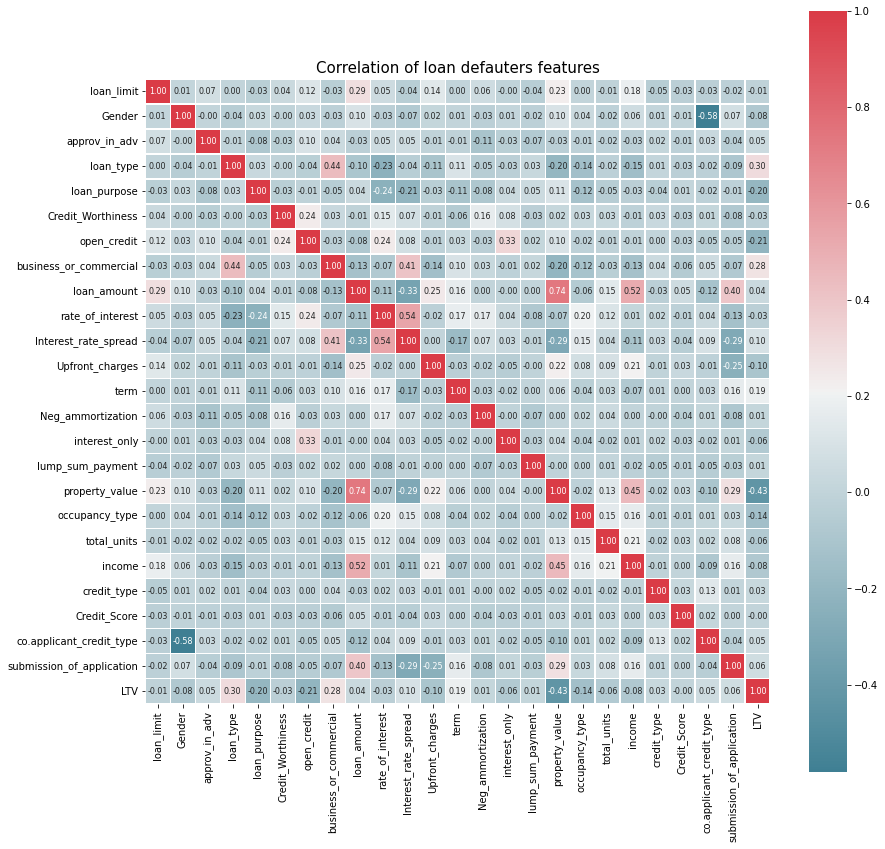

In [7]:

import matplotlib.pyplot as plt
corr = db.iloc[:,4:-3].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of loan defauters features', y=1.05, size=15)

In [8]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
db['age']= label_encoder.fit_transform(db['age'])
 
db['age'].unique()

array([0, 3, 1, 2, 4, 6, 5])

In [10]:
X = db.iloc[:,4:-3].values
Y = db.iloc[:,-1].values

In [ ]:
X.view()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 98.72881356],
       [ 0.        ,  0.        ,  0.        , ...,  3.        ,
         0.        , 99.24242424],
       [ 0.        ,  0.        ,  0.        , ...,  3.        ,
         0.        , 99.24242424],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  4.        ,
         0.        , 71.58635   ],
       [ 0.        ,  0.        ,  0.        , ...,  3.        ,
         0.        , 88.66906   ],
       [ 0.        ,  0.        ,  0.        , ...,  3.        ,
         0.        , 88.66906   ]])

In [11]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0,shuffle = True)

In [12]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# ANN Model with 4 Hidden Layer 
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=13,activation="relu",))
ann.add(tf.keras.layers.Dense(units=13,activation="relu",))
ann.add(tf.keras.layers.Dense(units=13,activation="relu",))
ann.add(tf.keras.layers.Dense(units=13,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss="binary_crossentropy",metrics=[tf.keras.metrics.BinaryAccuracy()])

In [14]:
model1 = ann.fit(X_train,Y_train,batch_size=32,epochs = 100,verbose='auto',validation_data=(X_test,Y_test),shuffle=True,use_multiprocessing= True)

Epoch 1/100
70/70 [==============================] - 2s 13ms/step - loss: 0.6807 - binary_accuracy: 0.5834 - val_loss: 0.6673 - val_binary_accuracy: 0.6130
Epoch 2/100
70/70 [==============================] - 0s 5ms/step - loss: 0.6493 - binary_accuracy: 0.6303 - val_loss: 0.6499 - val_binary_accuracy: 0.6257
Epoch 3/100
70/70 [==============================] - 0s 7ms/step - loss: 0.6253 - binary_accuracy: 0.6474 - val_loss: 0.6414 - val_binary_accuracy: 0.6120
Epoch 4/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6057 - binary_accuracy: 0.6578 - val_loss: 0.6347 - val_binary_accuracy: 0.6236
Epoch 5/100
70/70 [==============================] - 0s 6ms/step - loss: 0.5890 - binary_accuracy: 0.6808 - val_loss: 0.6290 - val_binary_accuracy: 0.6446
Epoch 6/100
70/70 [==============================] - 1s 8ms/step - loss: 0.5710 - binary_accuracy: 0.7020 - val_loss: 0.6149 - val_binary_accuracy: 0.6467
Epoch 7/100
70/70 [==============================] - 1s 12ms/step - l

In [17]:
list(model1.history)
#list(model1.params)

['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy']

In [18]:
ann_y_pred = ann.predict(X_test)
ann_y_pred = (ann_y_pred > 0.5)

from sklearn.metrics import confusion_matrix

print(' \n The confusion Matrix for ANN ','\n')
print(confusion_matrix(Y_test, ann_y_pred))

from sklearn.metrics import accuracy_score
print(' \n The accuracy score for ANN ','\n')
print(accuracy_score(Y_test,ann_y_pred))

acc_ann=accuracy_score(Y_test,ann_y_pred)  

 
 The confusion Matrix for ANN  

[[368 139]
 [ 74 370]]
 
 The accuracy score for ANN  

0.7760252365930599


In [19]:
##############################################################################################################################
##########################################     SVM Model #####################################################################
##############################################################################################################################

#### SVM Linear Kernel ### 

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', probability = True , verbose=True)
svm_model=svclassifier.fit(X_train, Y_train)

[LibSVM]

In [20]:
svm_y_pred = svclassifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(' \n The confusion Matrix for SVM : Linear Kernel ','\n')
print(confusion_matrix(Y_test,svm_y_pred))
print(classification_report(Y_test,svm_y_pred))

 
 The confusion Matrix for SVM : Linear Kernel  

[[425  82]
 [207 237]]
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       507
           1       0.74      0.53      0.62       444

    accuracy                           0.70       951
   macro avg       0.71      0.69      0.68       951
weighted avg       0.71      0.70      0.69       951



In [22]:
#### SVM Gaussian Kernel ### 
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',verbose=True)
svclassifier.fit(X_train, Y_train)
svm2_y_pred = svclassifier.predict(X_test)
print(' \n The confusion Matrix for SVM : Gaussian Kernel ','\n')
print(confusion_matrix(Y_test,svm2_y_pred))
print(classification_report(Y_test,svm2_y_pred))

[LibSVM] 
 The confusion Matrix for SVM : Gaussian Kernel  

[[441  66]
 [153 291]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       507
           1       0.82      0.66      0.73       444

    accuracy                           0.77       951
   macro avg       0.78      0.76      0.76       951
weighted avg       0.78      0.77      0.77       951



In [30]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range #, 1000, 0.0001
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf','linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.546 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.546 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.680 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.671 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.725 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.693 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.691 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [31]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [35]:
######################### MLP #################################################
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation = "relu",learning_rate = "adaptive",shuffle = True ,verbose=True,random_state=1, max_iter=200).fit(X_train, Y_train)
#clf.predict_proba(X_test[:1])

Iteration 1, loss = 0.68332367
Iteration 2, loss = 0.63325680
Iteration 3, loss = 0.60834705
Iteration 4, loss = 0.58997954
Iteration 5, loss = 0.57800024
Iteration 6, loss = 0.56738992
Iteration 7, loss = 0.55830872
Iteration 8, loss = 0.54993257
Iteration 9, loss = 0.54252295
Iteration 10, loss = 0.53583104
Iteration 11, loss = 0.52977148
Iteration 12, loss = 0.52439824
Iteration 13, loss = 0.51894870
Iteration 14, loss = 0.51387378
Iteration 15, loss = 0.50899687
Iteration 16, loss = 0.50336714
Iteration 17, loss = 0.49902305
Iteration 18, loss = 0.49472736
Iteration 19, loss = 0.49136040
Iteration 20, loss = 0.48758082
Iteration 21, loss = 0.48383143
Iteration 22, loss = 0.47939074
Iteration 23, loss = 0.47501399
Iteration 24, loss = 0.47139772
Iteration 25, loss = 0.46813562
Iteration 26, loss = 0.46388315
Iteration 27, loss = 0.46163874
Iteration 28, loss = 0.45800132
Iteration 29, loss = 0.45429222
Iteration 30, loss = 0.45066525
Iteration 31, loss = 0.44810630
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [46]:
print(" Best Parameter for MLP are :")
clf.get_params(deep=True)

 Best Parameter for MLP are :


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [37]:
MLP_y_pred=clf.predict(X_test)

In [38]:
clf.score(X_train, Y_train)

0.936429215509468

In [39]:
clf.score(X_test, Y_test)

0.8086225026288117

AUC Value for 'Artificial Neural Network' =  0.7795857988165681
AUC Value for 'SVM' with Linear Kernel =  0.6860240417932726
AUC Value for 'SVM' with Gaussian Kernel =  0.7626139453062529
AUC Value for MLP with adaptive LR =  0.8088983954368569


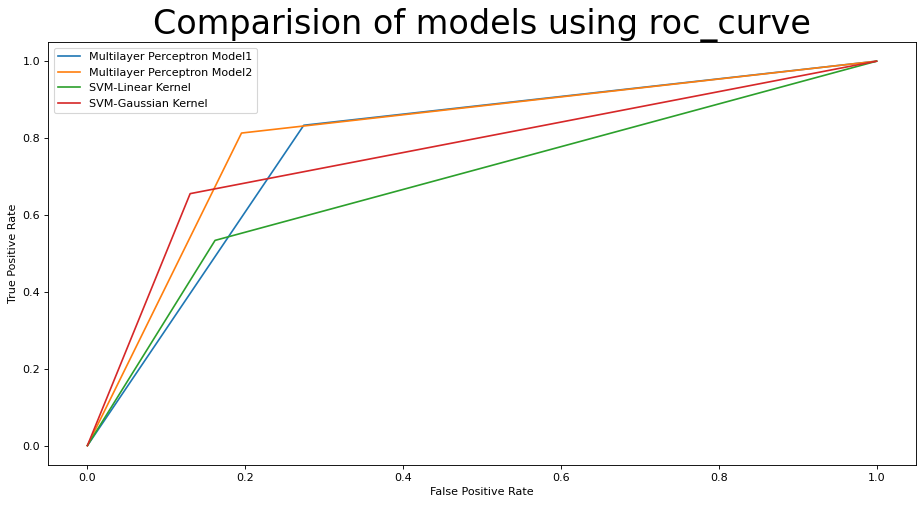

In [47]:
#Comparision of models using roc_curve

from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
from matplotlib.pyplot import figure

result1=[]

figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')

#knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_y_pred)
#nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_y_pred)
#cart_fpr, cart_tpr, _ = roc_curve(y_test, cart_y_pred)
#c5_fpr, c5_tpr, _ = roc_curve(y_test, c5_y_pred)
svm2_fpr, svm2_tpr, _ = roc_curve(Y_test, svm2_y_pred)
svm_fpr, svm_tpr, _ = roc_curve(Y_test, svm_y_pred)
ann_fpr, ann_tpr, _ = roc_curve(Y_test, ann_y_pred)
MLP_fpr ,MLP_tpr, _ = roc_curve(Y_test,MLP_y_pred)
# Printing values for AUC
print("AUC Value for 'Artificial Neural Network' = ",auc(ann_fpr, ann_tpr))
#a=auc(ann_fpr, ann_tpr)
#result1.append(a)


print("AUC Value for 'SVM' with Linear Kernel = ",auc(svm_fpr, svm_tpr))
print("AUC Value for 'SVM' with Gaussian Kernel = ",auc(svm2_fpr, svm2_tpr))
print("AUC Value for MLP with adaptive LR = ",auc(MLP_fpr, MLP_tpr))

# plot the roc curve for the model

pyplot.plot(ann_fpr, ann_tpr, linestyle='-', label='Multilayer Perceptron Model1')
pyplot.plot(MLP_fpr, MLP_tpr, linestyle='-', label='Multilayer Perceptron Model2')
pyplot.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM-Linear Kernel')
pyplot.plot(svm2_fpr, svm2_tpr, linestyle='-', label='SVM-Gaussian Kernel')


# axis labels

# incorrectly predicts the positive class
pyplot.xlabel('False Positive Rate')

# correctly predicts the positive class
pyplot.ylabel('True Positive Rate')

pyplot.title("Comparision of models using roc_curve", fontsize=30)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()